In [1]:
import seaborn as sns

In [3]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
diamonds.describe().T
#kayıp verileri görmezden gelir,kategorik verileri dikkate almaz "category"

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [16]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [17]:
df = diamonds.copy()

In [38]:
column_names = df.columns
column_names

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [12]:
df.shape

(53940, 10)

### Missing Values

In [52]:
df.isnull().values.any()

False

In [53]:
df.isnull().sum()
#df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [23]:
df.isna()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


### Categorical Variables

In [32]:
cat_df = df.select_dtypes(include=["category"])

In [33]:
cat_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [43]:
cat_df["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [46]:
cat_df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [49]:
cat_df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

<AxesSubplot:>

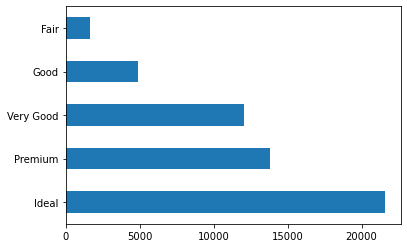

In [51]:
df["cut"].value_counts().plot.barh()

### Continuously Variable

In [55]:
num_df = df.select_dtypes(include=["float64","int64"])

In [56]:
num_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [57]:
num_df["depth"].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

### Graphics

In [58]:
#Ordinal
from pandas.api.types import CategoricalDtype

In [59]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [67]:
cut_cat = ["Fair",'Good','Very Good','Premium','Ideal']

In [68]:
df.cut = df.cut.astype(CategoricalDtype(categories=cut_cat ,ordered= True)) #sıralı olarak kategorik yapma

In [69]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

#### Barplot
-Gruplanmış kategorik
-Toplam,ort,medyan,... Aggregate func.

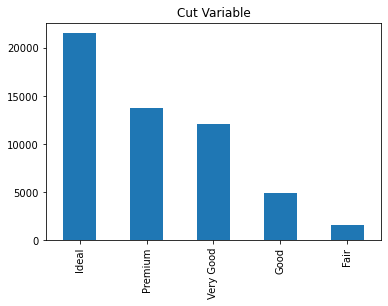

In [74]:
(df["cut"]
 .value_counts()
 .plot.bar()
 .set_title("Cut Variable")); #pandas

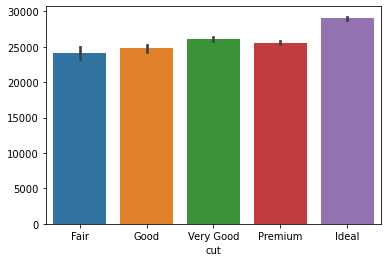

In [75]:
sns.barplot(x="cut",y=df.cut.index, data=df);

#### Catplot

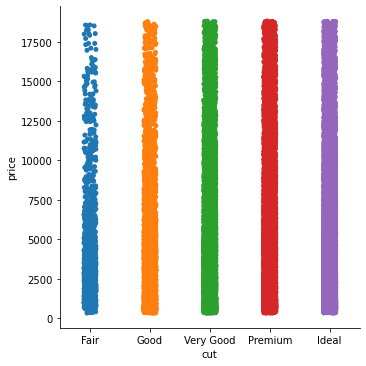

In [77]:
sns.catplot(x="cut",y="price",data=df) #kategorik değişkenler için

<AxesSubplot:xlabel='cut', ylabel='price'>

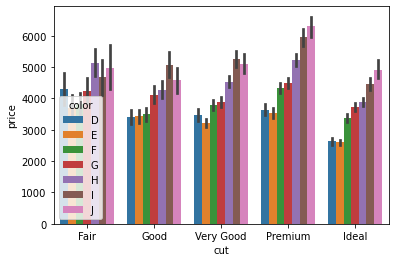

In [78]:
sns.barplot(x="cut",y="price",hue="color",data=df) #barplot ve catplot birbiri yerine kullanılabilir.
#color sınıfına göre

Sütunlar =(color,cut)GroupBy işleminden sonra oluşan ortalama
,Çubuklar = Standart Sapma değerleri

In [79]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

### Histogram ve Yoğunluk
-Sayısal Aralıklar,
-Dağılım grafiği,
-Sürekli değerler,
Width=(3.5 x Standart Sapma) / 3√n=Değer sayısı,bins=Kaç birimlik aralıklar

C:\Users\speed\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


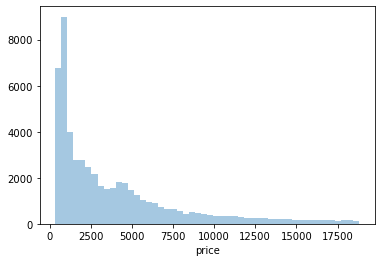

In [81]:
sns.distplot(df.price,kde=False);

C:\Users\speed\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


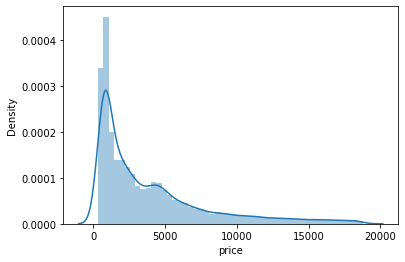

In [83]:
sns.distplot(df.price);
#çizgi = olasılık yoğunluk fonksiyonu

C:\Users\speed\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


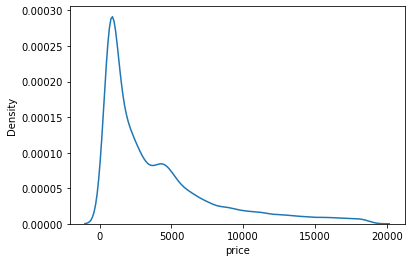

In [84]:
sns.distplot(df.price,hist=False);

<AxesSubplot:xlabel='price', ylabel='Density'>

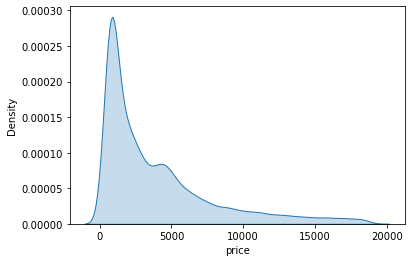

In [85]:
sns.kdeplot(df.price, shade=True)

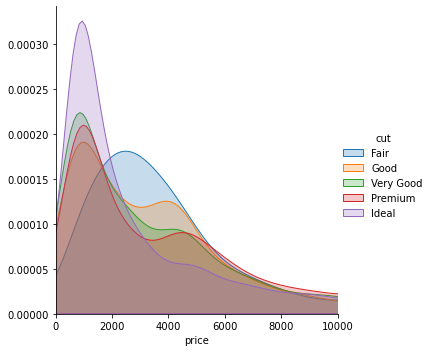

In [91]:
(sns
 .FacetGrid(df,
             hue="cut",
             height=5,
             xlim=(0,10000))#aralık belirleme
 .map(sns.kdeplot,"price",shade=True)
 .add_legend()
);

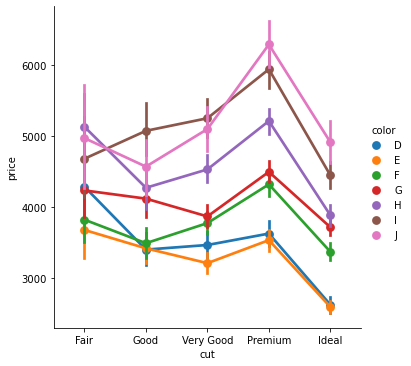

In [93]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df);

### Boxplot
-Grupların arasındaki veri dağılımı
-Sayısal değikenler

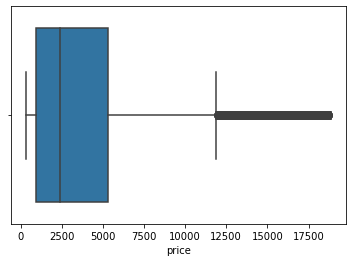

In [95]:
sns.boxplot(x=df["price"]);

<AxesSubplot:xlabel='cut', ylabel='price'>

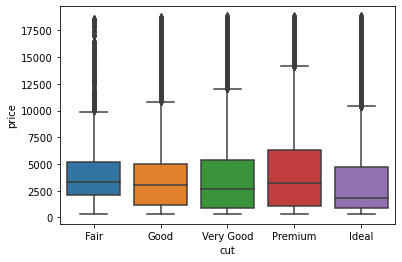

In [100]:
sns.boxplot(x="cut",y="price",data=df)

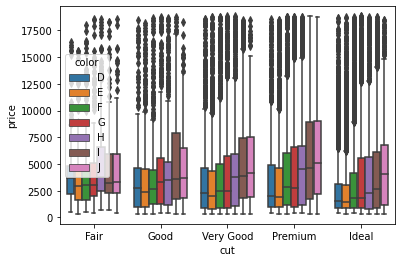

In [102]:
sns.boxplot(x="cut",y="price",hue="color",data=df);

### Violin

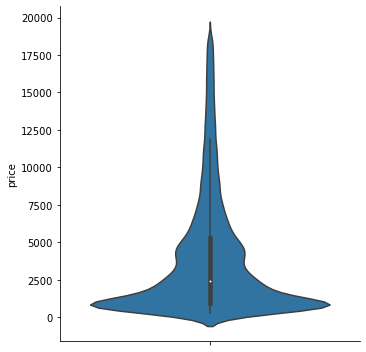

In [105]:
sns.catplot(y="price",kind="violin",data=df);

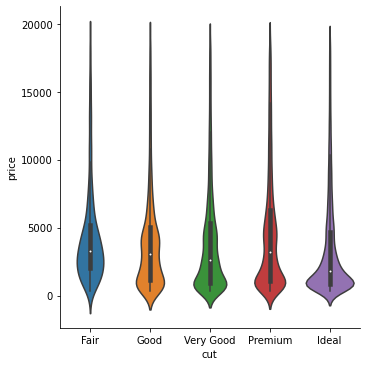

In [106]:
sns.catplot(x="cut",y="price",kind="violin",data=df);

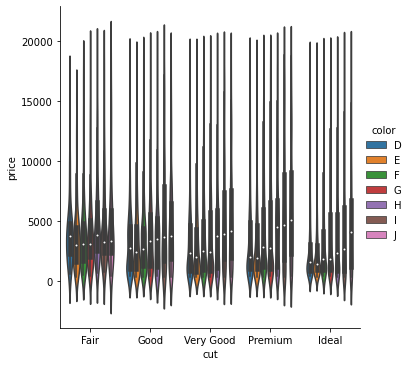

In [107]:
sns.catplot(x="cut",y="price",hue="color",kind="violin",data=df);

## KORELASYON

### Scatterplot
-İki sayısal grup
-Tek bir gözlem
-Dağılım
X ekseni = örneğin bir özelliğini gösterir
Y ekseni = aynı örneğin farklı bir özelliğini gösterir

In [112]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='price', ylabel='carat'>

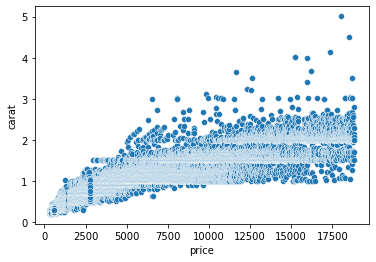

In [126]:
sns.scatterplot(x="price",y="carat",data=df)

#### Overlapping problemi
swarmplot = Plot a categorical scatter with non-overlapping points.

<AxesSubplot:xlabel='price', ylabel='carat'>

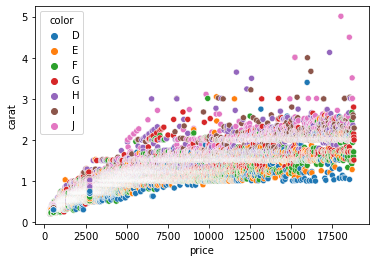

In [129]:
sns.scatterplot(x="price",y="carat",hue="color",data=df)

In [135]:
tips = sns.load_dataset("tips")

In [136]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

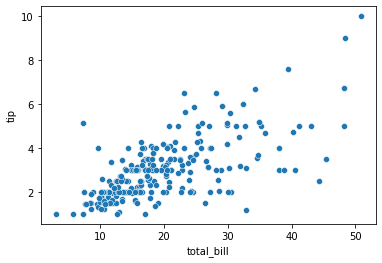

In [137]:
sns.scatterplot(x="total_bill",y="tip",data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

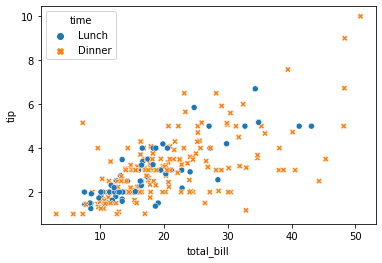

In [139]:
sns.scatterplot(x="total_bill",y="tip",hue="time",style="time",data=tips)

### Doğrusal İlişki

In [132]:
import matplotlib.pyplot as plt

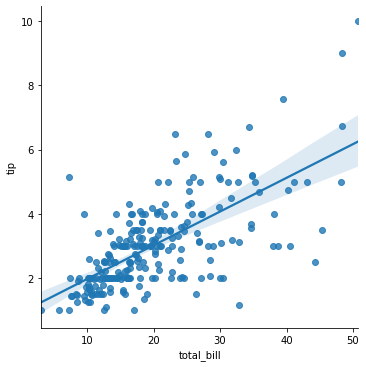

In [140]:
sns.lmplot(x="total_bill",y="tip",data=tips)

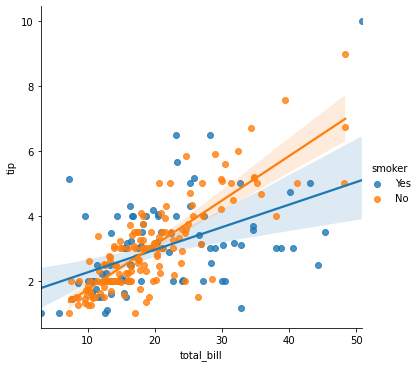

In [141]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=tips)

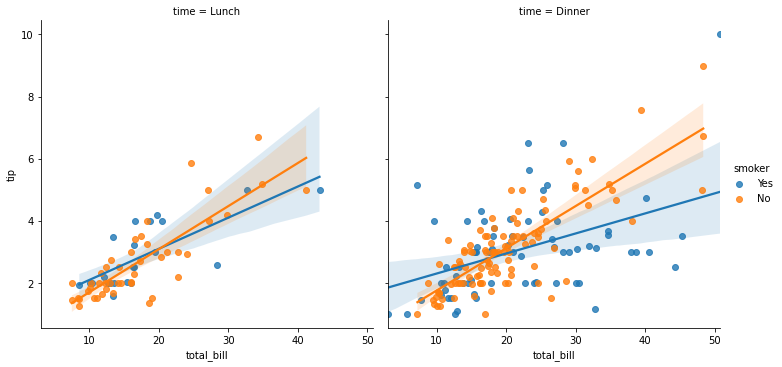

In [142]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",data=tips)

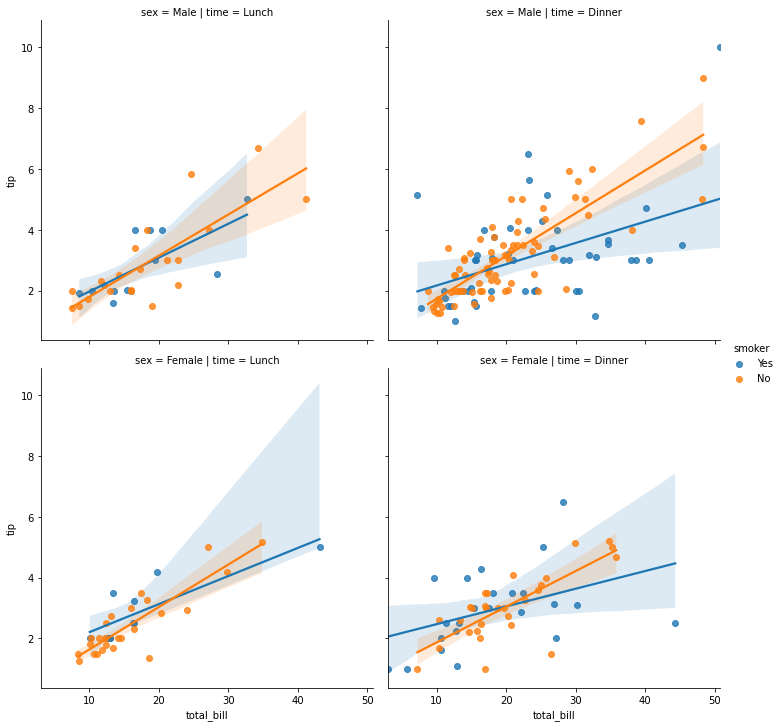

In [143]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=tips)

### Scarplot Matrisi

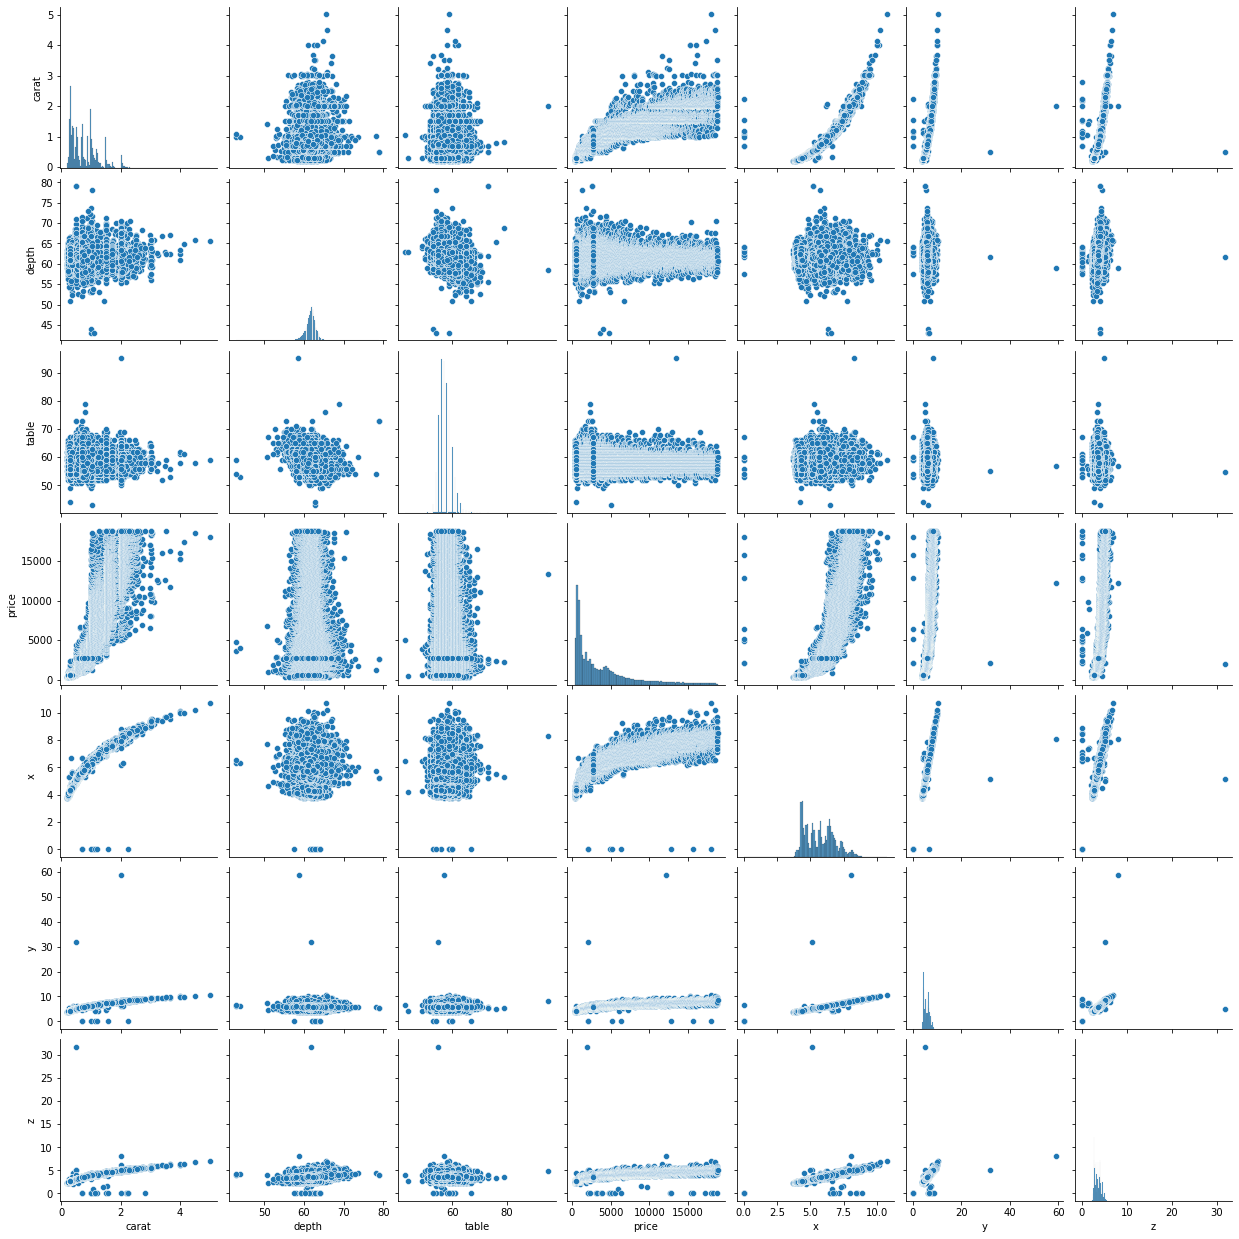

In [145]:
sns.pairplot(df)

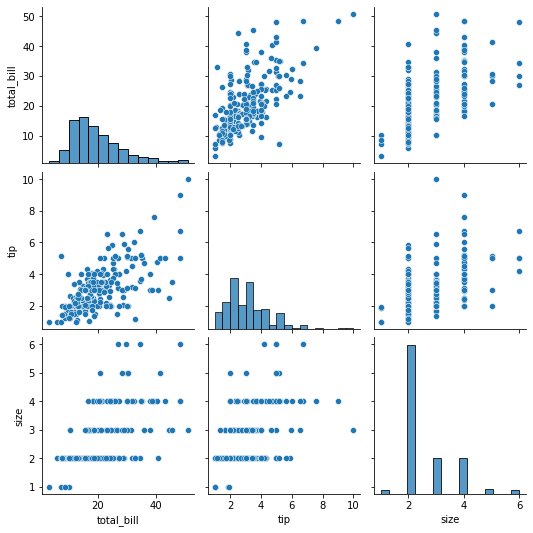

In [146]:
sns.pairplot(tips)

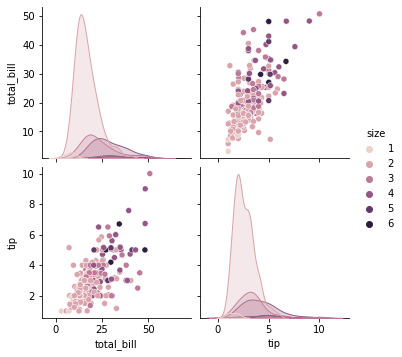

In [151]:
sns.pairplot(tips,hue="size")

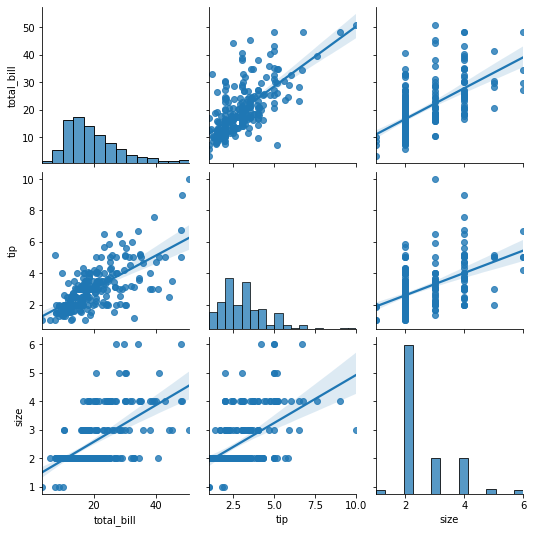

In [152]:
sns.pairplot(tips,kind="reg")

### HeatMap
-Matris değerlerini göstermek
-Korelasyon haritası,karmaşıklık matrisi

In [155]:
ps = sns.load_dataset("flights")

In [158]:
ps= ps.pivot("month","year","passengers")

In [160]:
ps

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

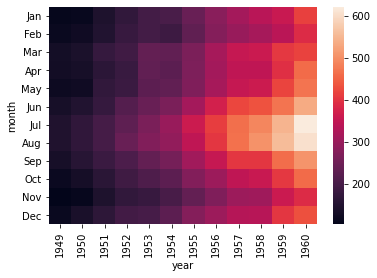

In [162]:
sns.heatmap(ps)

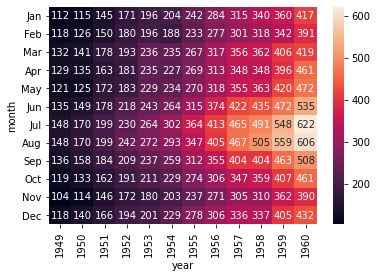

In [164]:
sns.heatmap(ps,annot=True,fmt="d");

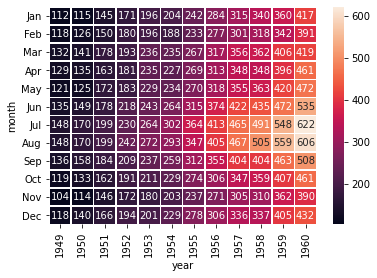

In [165]:
sns.heatmap(ps,annot=True,fmt="d",linewidths=.5);

### Lineplot
-İki sayısal değer kümesi
-Artan veya azalan değerler
-Zaman serisi,sin-cos

In [169]:
fm = sns.load_dataset("fmri")

In [170]:
fm.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

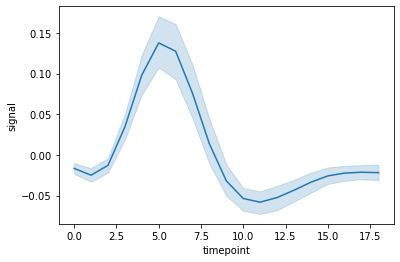

In [174]:
sns.lineplot(x="timepoint",y="signal",data=fm)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

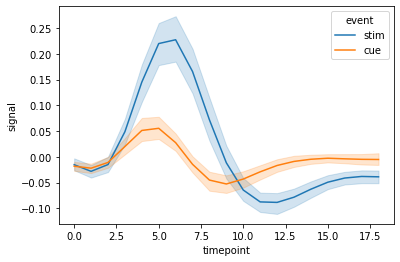

In [175]:
sns.lineplot(x="timepoint",y="signal",hue="event",data=fm)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

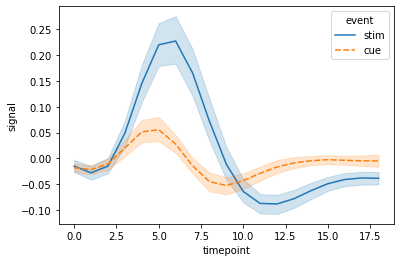

In [176]:
sns.lineplot(x="timepoint",y="signal",hue="event",style="event",data=fm)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

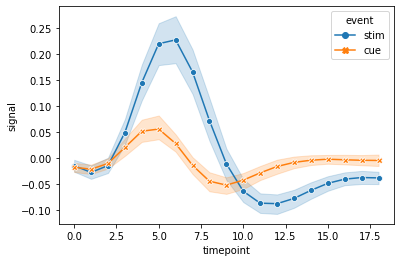

In [177]:
sns.lineplot(x="timepoint",y="signal",hue="event",style="event",markers=True,dashes=False,data=fm)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

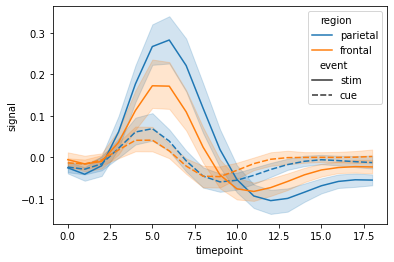

In [178]:
sns.lineplot(x="timepoint",y="signal",hue="region",style="event",data=fm)

### Basit Zaman Serisi Grafiği

In [181]:
!pip install pandas_datareader
import pandas_datareader as pr

In [184]:
apple = pr.get_data_yahoo("AAPL", start="2016-01-01", end="2019-08-25")

In [186]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.251438
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.643717
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.181011
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.202667
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.320070


In [188]:
kapanis = apple["Close"]

In [189]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

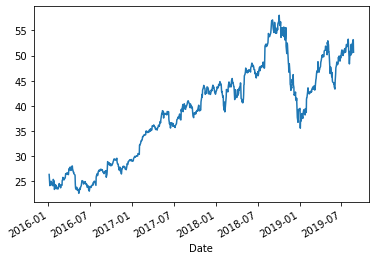

In [190]:
kapanis.plot()

In [191]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [193]:
import pandas as pd

In [195]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [196]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

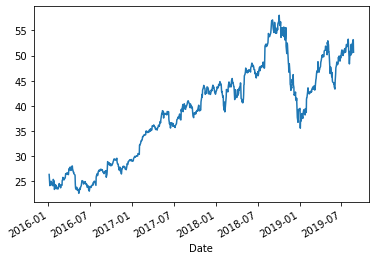

In [197]:
kapanis.plot()

In [199]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object